# Session 3, Spring 2019: Deep Learning Part 2
# Lab 1: Review of Neural Networks
 
## Date:  Saturday, January 26th 2019

#### Authors: Pavlos Protopapas, Patrick Ohiomoba and Srinivasan Srivatsan

## Table of Contents

1. [Introduction](#Introduction)
2. [Preliminaries](#Preliminaries)
3. [Setting up Floydhub](#Floydhub)


## Introduction

In the first lecture, we reviewed the basics of neural networks including Multi-Layer Perceptrons (MLP) and Convolutional Neural Networks (CNN). In today's lab we will be introducing you to [Floydhub](https://www.floydhub.com), an environment for developing, training and running neural networks. You will then create a simple MLP with basic `python` libraries in order to review the practical intuition behind how neural networks function.  You will then  build a basic MLP using some modern deep learning libraries (i.e. `tensorflow` and `keras`) to classify MNIST digits.  We will then approach the same problem using CNNs.  The basic ideas will be demonstrated with code snippets and exercises.

## Preliminaries

### Expectations

1. Make sure you clone the current lab.  Note that we may have made last-minute changes.
2. You'll most likely do most of your work on Floydhub, but it may be useful to do some of it on your local machine.  In this case you should make sure your local environment is able to use `Jupyter` notebooks.  The recommended way of doing this is to install [`Anaconda`](https://www.anaconda.com/download/#macos).  If you don't have `Anaconda` now and aren't sure how to run a `Jupyter` notebook from your local machine, let us know.  (Anaconda may be necessary if you're using windows to install and use Floydhub).

In addition to the `Jupyter` notebooks, you are expected to be familiar with programming in `python` including basic data science libraries like `numpy` and `matplotlib`.  You should also especially after the first lecture be familiar with basic material related to neural networks.  We're happy to answer some questions during lab, but we'll possibly also refer you to extra reading if it takes us too far away from our current topic.

### A Workflow Suggestion

From time to time, we will push last-minute changes to a lab.  In order to prevent our modifications from adversely affecting you, we recommend the following workflow:

1. Clone the repo before each session.
2. Make a copy of the current lab called `Lab{N}-working.ipynb` and do all your work in the working notebook.  (N should be the number of the lab.  For this lab, Lab 1, N is equal 1).
3. Whenever we make a last-minute change, you won't run the risk of losing all your lab work.

<a id='Floydhub'></a>

## Setting Up Floydhub

The first goal of this lab is to get you up and running on [Floydhub](https://www.floydhub.com).  Originally if you wanted to develop and train a neural network model, you'd need to have the hardware yourself (including the GPUs).  Later it became more common take advantage of GPU instances on general purpose cloud services (Amazon AWS/Google Compute Engine/Microsoft Azure) to develop and deploy neural network models.  Floydhub is one of a new generation of Infrastructure-as-a-Service (IAAS) companies that make it easy and affordable to develop and use deep learning architectures in the cloud (other examples include [PaperSpace](https://paperspace.com) and [Crestle](https://crestle.com)).  We'll sign-up for Floydhub accounts.  Then we'll install the necessary software on our systems to login to and launch  floydhub environments.  Finally we'll create those environments and use them to deploy our neural network models.

### Sign-up for a Floydhub account

Go to https://www.floydhub.com.  You should be greated with a screen that looks like the following:

![](./floydhub_home.png)

Click on one of the sign-up buttons and it will start you on the process of creating an account (with an email address you provide for login purposes).  There's a free sign-up option which only allows you to create public workspaces and limits your total compute time.  For the purposes of our course, the free option may be sufficient.  There's a paid upgrade for $9/month which comes with among other conveniences private workspaces and more compute time.

### Install the floyd-cli command line client

Once you've signed up for an account you should install `floyd-cli`, a command line client that floydhub provides in order to ease interaction with floydhub's infrastructure.  Installation instructions can be found [here](https://docs.floydhub.com/guides/basics/install/) but we'll highlight the most important aspects.

1. If you have a local machine that doesn't have python and/or pip environment involved, you should install one (preferably using anaconda https://docs.anaconda.com/anaconda/install/).

2. Once you have pip or anaconda setup on your machine, you can install `floyd-cli` using the most appropriate one the following commands

`$ conda install -y -c conda-forge -c floydhub floyd-cli`

`$ pip install -U floyd-cli`

3.  One you have `floyd-cli` installed, you can verify that installation worked properly as follows:

`$ floyd --help`

The output of `floyd --help` should be a usage message with options for running floyd-cli


```
Usage: floyd [OPTIONS] COMMAND [ARGS]...

  Floyd CLI interacts with FloydHub server and executes your commands.
  Detailed help is available at https://docs.floydhub.com/commands/.

Options:
  -h, --host TEXT  Floyd server endpoint
  -v, --verbose    Turn on debug logging
  --help           Show this message and exit.

Commands:
  clone    - Download all files from a job Eg:...
  data     Subcommand for data operations.
  delete   Delete a training job.
  info     View detailed information of a job.
  init     Initialize new project at the current path.
  login    Login to FloydHub.
  logout   Logout of FloydHub.
  logs     View the logs of a job.
  output   View the files from a job.
  restart  Restart a finished job as a new job.
  run      Start a new job on FloydHub.
  status   View status of all jobs in a project.
  stop     Stop a running job.
  upgrade  Upgrade CLI to the latest version.
  version  View the current version of the CLI.
```

### Logging in with floyd-cli command line client

You'll now need to login with the `floyd` command as follows --

`floyd login`

A browser window/tab will open and prompt you for your username and password.  If you want to use the command line to authenticate with your username and password use the --username parameter.

```
$ floyd login -u username
Login with your FloydHub username and password to run jobs.
Password: 

```

For token authentication, use the --token parameter:

```
$ floyd login --token
Please paste the authentication token from https://www.floydhub.com/settings/security.
This is an invisible field. Paste token and press ENTER:
Login Successful as alice
```

## Keras and MLPs

### Neural Net Architectures Encoding Functions


**Motivating Question:** What exact kind of mathematical/statistical object is encoded by a neural network?

For a network with the following architecture (a single output and one hidden layer), write the closed form expression for the function $f$ represented by the network.

Assume that the activation function at the output node is the identity funciton. Use the following notation:
- let $\mathbf{x}\in \mathbb{R}^D$ be the input; let the components of $\mathbf{x}$ be indexed by $d$
- let $H$ be the total number of hidden nodes, indexed by $h$
- let $\phi_h$ be the activation function at the hidden node $h$
- let $\mathbf{u}_h \in \mathbb{R}^D$ be the weights connecting the input to the $h$-th hidden node
- let $\mathbf{a} \in \mathbb{R}^H$ be the bias for the hidden layer
- let $\mathbf{v} \in \mathbb{R}^H$ be the weights connecting the hidden nodes to the output
- let $b \in \mathbb{R}$ be the bias for the output layer

![](figs/single_hidden_layer.jpg)

For each hidden node $h$, a linear combination of the input, $\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}$, is transformed by the activation function $\phi_h$. Thus, the output of each hidden node $h$ is
$$
\phi_h(\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}).
$$
At the output node, a linear combination of the hidden nodes is taken. Since the activation function here is the identity, the final output of the MLP is
$$
\begin{aligned}
f(\mathbf{x}) = b + \sum_{h=1}^H v_h\phi_h(\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}).
\end{aligned}
$$

### Approximating a Function with a Neural Network

**Motivating Question:** We saw in above that each neural network represents a function that depends on our choice of activation function for each node. In practice, we choose the same activation function for all nodes, from a small set of simple functions. It makes sense to ask just how expressive such networks can be. That is, ***can any function be reasonably approximated by a neural network?*** For a fixed function, ***what kind of archicture do we need in order to approximate it?*** Deep (multiple layers) or wide (many hidden nodes in one layer)?

![](figs/activation-functions.png)

Let's get to work.  First, we import our basic libraries.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# `Keras` Basics 

## Keras Installation

If you haven't already, please install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

Note the following:

* cuDNN is only required if your machine has an NVidia graphics card (GPU)
* For this tutorial, HDF5 and h5py are not required
* graphviz and pydot are not required

In [34]:
import keras
keras.__version__

'2.2.4'

# Exploring Neural Networks
Let's try to redo the problem from last week.  Recall that we had a function $$f\left(x\right) = \exp\left(-x^{2}\right)$$ and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [35]:
from keras import models
from keras import layers

Now we set up a network.  Let's do a single hidden layer with two neurons.  Last week we tried to manually tune the weights and things didn't work so well.

Before we get started, we need to create some data.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [36]:
from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.exp(-x * x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Let's create a neural network model with `keras`.  We're going to use a single layer and just $2$ neurons in that layer.  To be consisten with last week, we will start with the sigmoid activation function.  We also choose a linear output layer like last time.  The loss function is selected to be the mean squared error.  In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function.

In [37]:
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just xc

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear'))

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

Our model is now ready to use.  We haven't trained it yet, but we'll do that now using the `fit` method.  Notice that we also need to specify the *batch size* for the stochastic gradient decent algorithm as well as the number of epochs to run.

In [38]:
# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=0)

Great!  We've trained a model.  Now it's time to explore the results.  The first thing to notice is the value of the loss function.  Does it look okay to you?

Let's see what the results look like.

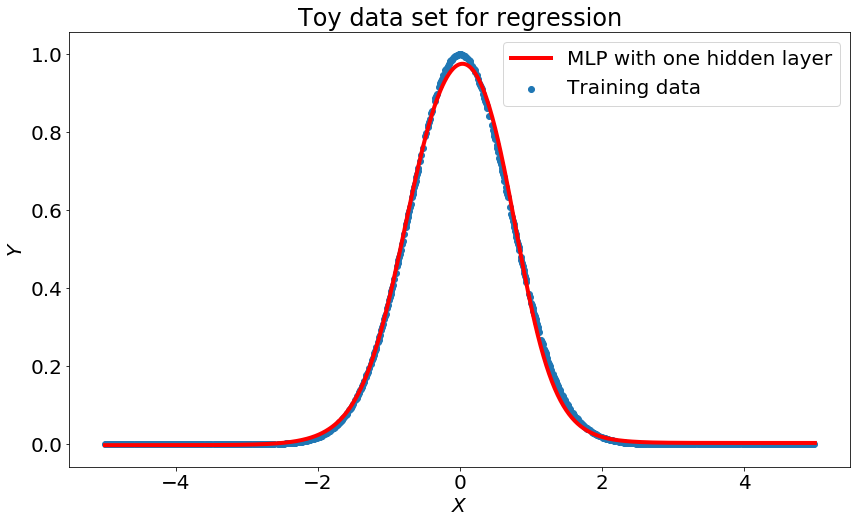

In [39]:
# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

How do things look?

### Exercise
Explore the following:
* Different activation functions
  - ReLU
  - $tanh$
  - [Something else?](https://keras.io/activations/)
* Change the number of neurons
  - Increase it from $2$ to $4$ at first
  - What number seems to work well?
* Try to play with the number of epochs and the batch size.  Do these have an impact?

### Exercise
Plot the loss function as a function of the epochs.

#### Hint
You can access the loss function values with the command:
```python
model_history.history['loss']
```

#### Model Performance
How good is the model?  We can compute the $R^{2}$ score to get a sense of the model performance.

In [10]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

test_score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

700/700 [==============================] - 0s 33us/step
Train loss: 0.06098430954984256
Train R2: 0.34641574884757576
300/300 [==============================] - 0s 10us/step
Test loss: 0.06331362962722778
Test R2: 0.3325304449764711


### Exercise
Plot the train/test performace against the number of hidden nodes, H.

**Hint**
You should loop over enough neurons to make a decent plot.  However, if you make $H$ too big then it will take a long time to get a solution.  Choosing $H = [2, 4, 6, 8, 10]$ may be a good place to start.  You may want to try a larger list at some point in your free time.

## Going Deeper:  Changing the Number of Layers

Now fix a width $H$ and let's fit a MLP network with **multiple** hidden layers, each with the same width. Start with sigmoid or $tanh$ activation functions for the hidden nodes and linear activation for the output. 

***Experiment with the number of layers and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. You should compare the MLP to your model with a single hidden layer (in terms of quality of fit, efficiency and generalizability).

In [ ]:
# number of hidden nodes
H = 4
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model2 = Sequential()
# layer 0
# model2.add(...) 

# layer 1
# model2.add(...) 

# layer 2
# model2.add(...) 

# layer 3
# model2.add(...) 

# layer 4
# model2.add(...) 

# layer 5
# model2.add(...) 

# layer 6
# model2.add(...) 

# configure the model
# model2.compile(...)

In [ ]:
# fit the model
# model2.fit(...)

In [ ]:
# use our model to predict in the range we want
X_range = np.linspace(-4, 4, 500)
y_pred = model2.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with 6 hidden layers')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

In [ ]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

In [ ]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

### Exercise
What if we wanted to approximate a different function $f$ with MLP's?  Consider the functions $f_{1}\left(x\right) = x\sin\left(x\right)$ and $f_{2}\left(x\right) = \left|x\right|$.  Can you create a network that can represent these functions?

***Experiment with approximating a few different non-linear functions with wide but shallow networks as well as deep but narrow networks.***

How expressive do you think MLP's are?

<a id='mnist'></a>

## Classifying MNIST

The [`MNIST` dataset](https://keras.io/datasets/#mnist-database-of-handwritten-digits) is a classical machine learning problem in classification.  The dataset contains 60000 images of handwritten digits (from 0-9).  The machine learning goal is to have an algorithm that can recognize a handwritten digits.  Using `Keras`, a simple fully-connected feedforward network can achieve a classification accuracy of approximately 97.8%.  A convolutional neural network (CNN) applied to the same dataset can increase the accuracy even more.

#### Instantiating a MLP

The inputs to the our MLP for MNIST Classification are input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). In this case, we’ll configure the MLP to process inputs of size `(28, 28, 1)`, which is the format of the MNIST images. We’ll do this by passing the argument `input_shape=(28, 28, 1)` to the first layer.

In [65]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load data and preprocess
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # load MNIST data

train_images = train_images.reshape((60000, 784)) # Reshape to get third dimension
train_images = train_images.astype('float32') / 255 # Normalize between 0 and 1

test_images = test_images.reshape((10000, 784)) # Reshape to get third dimension
test_images = test_images.astype('float32') / 255 # Normalize between 0 and 1

# Convert labels to categorical data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [66]:
mnist_mlp_model = models.Sequential() # Create sequential model

# Add network layers
mnist_mlp_model.add(layers.Dense(256, activation='relu', input_shape=(784,)))
mnist_mlp_model.add(layers.Dropout(0.2))

mnist_mlp_model.add(layers.Dense(128, activation='relu'))
mnist_mlp_model.add(layers.Dropout(0.2))

mnist_mlp_model.add(layers.Dense(10, activation='softmax'))

mnist_mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compile model
mnist_mlp_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
mnist_mlp_model.fit(train_images, train_labels, epochs=5, batch_size=64)

#  Evaluate the model on the test data:
test_loss, test_acc = mnist_mlp_model.evaluate(test_images, test_labels)
test_acc

Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2760 - acc: 0.9171
Epoch 2/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.1302 - acc: 0.9614
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0993 - acc: 0.9705
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0849 - acc: 0.9754
Epoch 5/5
10000/10000 [==============================] - 0s 48us/step


0.9781

So we've verified the accuracy claim of ~ 97.8%

#### Instantiate a small convnet

The inputs to the convnet are input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). In this case, we’ll configure the convnet to process inputs of size `(28, 28, 1)`, which is the format of the MNIST images. We’ll do this by passing the argument `input_shape=(28, 28, 1)` to the first layer.

In [73]:
# Load data and preprocess
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # load MNIST data

train_images = train_images.reshape((60000, 28, 28, 1)) # Reshape to get third dimension
train_images = train_images.astype('float32') / 255 # Normalize between 0 and 1

test_images = test_images.reshape((10000, 28, 28, 1)) # Reshape to get third dimension
test_images = test_images.astype('float32') / 255 # Normalize between 0 and 1

# Convert labels to categorical data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [74]:
mnist_cnn_model = models.Sequential() # Create sequential model

# Add network layers
mnist_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
mnist_cnn_model.add(layers.MaxPooling2D((2, 2)))
mnist_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
mnist_cnn_model.add(layers.MaxPooling2D((2, 2)))
mnist_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Discussion

The output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, filters)`. The width and height dimensions tend to shrink as you go deeper in the network. The number of filters is controlled by the first argument passed to the `Conv2D` layers (32 or 64).

#### Densely connected classifier network
The next step is to feed the last output tensor (of shape `(3, 3, 64)`) into a densely connected classifier network like those you’re already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few `Dense` layers on top.

In [75]:
mnist_cnn_model.add(layers.Flatten())
mnist_cnn_model.add(layers.Dense(64, activation='relu'))
mnist_cnn_model.add(layers.Dense(10, activation='softmax'))

mnist_cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                36928     
__________

As you can see, the `(3, 3, 64)` outputs are flattened into vectors of shape `(576,)` before going through two `Dense` layers.
Now, let’s train the convnet on the MNIST digits.

In [76]:
# Compile model
mnist_cnn_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
mnist_cnn_model.fit(train_images, train_labels, epochs=5, batch_size=64)

#  Evaluate the model on the test data:
test_loss, test_acc = mnist_cnn_model.evaluate(test_images, test_labels)
test_acc

Epoch 1/5
60000/60000 [==============================] - 24s 402us/step - loss: 0.1723 - acc: 0.9461
Epoch 2/5
60000/60000 [==============================] - 25s 424us/step - loss: 0.0463 - acc: 0.9856
Epoch 3/5
60000/60000 [==============================] - 26s 437us/step - loss: 0.0324 - acc: 0.9903
Epoch 4/5
60000/60000 [==============================] - 25s 419us/step - loss: 0.0248 - acc: 0.9925
Epoch 5/5
10000/10000 [==============================] - 1s 139us/step


0.9906

Whereas the densely connected network from ImageClassification had a test accuracy of 97.8%, the basic convnet has a test accuracy of 99.3%: we decreased the error rate by 68% (relative) with only 5 epochs. Not bad!
But why does this simple convnet work so well, compared to a densely connected model? To answer this, let’s dive into what the `Conv2D` and `MaxPooling2D` layers do.

<a id='part12'></a>
### 1.2 - The convolution operation

The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space (for example, for an MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns: in the case of images, patterns found in small 2D windows of the inputs. In the previous example, these windows were all $3 \times 3$.

![breaking images into patterns](figs/cnn1.png)


This key characteristic gives convnets two interesting properties:
1. The patterns they learn are *translation invariant*. After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to learn the pattern anew if it appeared at a new location. This makes convnets data efficient when processing images (because the visual world is fundamentally translation invariant): they need fewer training samples to learn representations that have generalization power.
2. They can learn *spatial hierarchies of patterns* . A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual con- cepts (because the visual world is fundamentally spatially hierarchical).

![spatial hierarchies](figs/cnn2.png)


Convolutions operate over 3D tensors, called *feature maps*, with two spatial axes (*height* and *width*) as well as a *depth* axis (also called the *channels* axis). For an RGB image, the dimension of the depth axis is 3, because the image has three color channels: red, green, and blue. For a black-and-white picture, like the MNIST digits, the depth is 1 (levels of gray). The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an *output feature map*. This output feature map is still a 3D tensor: it has a width and a height. Its depth can be arbitrary, because the output depth is a parameter of the layer, and the different channels in that depth axis no longer stand for specific colors as in RGB input; rather, they stand for *filters*. Filters encode specific aspects of the input data: at a high level, a single filter could encode the concept “presence of a face in the input,” for instance.

In the MNIST example, the first convolution layer takes a feature map of size `(28, 28, 1)` and outputs a feature map of size `(26, 26, 32)`: it computes 32 filters over its input. Each of these 32 output channels contains a $26 \times 26$ grid of values, which is a *response map* of the filter over the input, indicating the response of that filter pattern at different locations in the input. That is what the term *feature map* means: every dimension in the depth axis is a feature (or filter), and the 2D tensor `output[:, :, n]` is the 2D spatial *map* of the response of this filter over the input.

Convolutions are defined by two key parameters:
1. *Size of the patches extracted from the inputs* - These are typically $3 \times 3$ or $5 \times 5$. In the example, they were $3 \times 3$, which is a common choice.
2. *Depth of the output feature map*  - The number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.

In [`Keras` `Conv2D`](https://keras.io/layers/convolutional/#conv2d) layers, these parameters are the first arguments passed to the layer: `Conv2D(output_depth, (window_height, window_width))`.

A convolution works by *sliding* these windows of size $3 \times 3$ or $5 \times 5$ over the 3D input feature map, stopping at every possible location, and extracting the 3D patch of surrounding features (shape `(window_height, window_width, input_depth)`). Each such 3D patch is then transformed (via a tensor product with the same learned weight matrix, called the *convolution kernel* ) into a 1D vector of shape `(output_depth,)`. All of these vectors are then spatially reassembled into a 3D output map of shape `(height, width, output_depth)`. Every spatial location in the output feature map corresponds to the same location in the input feature map (for example, the lower-right corner of the output contains information about the lower-right corner of the input). For instance, with $3 \times 3$ windows, the vector `output[i, j, :]` comes from the 3D patch `input[i-1:i+1,j-1:j+1,:]`. 

<a id='part13'></a>
### 1.3 - The max-pooling operation

In the convnet example, you may have noticed that the size of the feature maps is halved after every `MaxPooling2D` layer. For instance, before the first `MaxPooling2D` layers, the feature map is $26 \times 26$, but the max-pooling operation halves it to $13 \times 13$. That’s the role of max pooling: to aggressively **downsample** feature maps, much like strided convolutions.

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. It’s conceptually similar to convolution, except that instead of transforming local patches via a learned linear transformation (the convolution kernel), they’re transformed via a hardcoded `max` tensor operation. A big difference from convolution is that max pooling is usually done with $2 \times 2$ windows and stride 2, in order to downsample the feature maps by a factor of 2. On the other hand, convolution is typically done with $3 \times 3$ windows and no stride (stride 1).

Why downsample feature maps this way? Why not remove the max-pooling layers and keep fairly large feature maps all the way up? Let’s look at this option. The convolutional base of the model would then look like this:

In [6]:
# TODO

# Create a sequential model with three Conv2D layers, each with relu activation
# layer 1: 32, (3,3)
# layer 2: 64, (3,3)
# layer 3: 64, (3,3)

# Print a model summary.  You should have 55,744 total and trainable parameters

model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu',
                      input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


What’s wrong with this setup? Two things:
1. It isn’t conducive to learning a spatial hierarchy of features. The $3 \times 3$ windows in the third layer will only contain information coming from 7 × 7 windows in the initial input. The high-level patterns learned by the convnet will still be very small with regard to the initial input, which may not be enough to learn to classify digits (try recognizing a digit by only looking at it through windows that are 7 × 7 pixels!). We need the features from the last convolution layer to contain information about the totality of the input.
2. The final feature map has $22 \times 22 \times 64 = 30,976$ total coefficients per sample. This is huge. If you were to flatten it to stick a `Dense` layer of size 512 on top, that layer would have 15.8 million parameters. This is far too large for such a small model and would result in intense overfitting.

In short, the reason to use downsampling is to reduce the number of feature-map coefficients to process, as well as to induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of the original input they cover).

Note that max pooling isn’t the only way you can achieve such downsampling. You can also use strides in the prior convolution layer. And you can use average pooling instead of max pooling, where each local input patch is transformed by taking the average value of each channel over the patch, rather than the max. But max pooling tends to work better than these alternative solutions. In a nut- shell, the reason is that features tend to encode the spatial presence of some pattern or concept over the different tiles of the feature map (hence, the term *feature map*), and it’s more informative to look at the *maximal presence* of different features than at their *average presence*. So the most reasonable subsampling strategy is to first produce dense maps of features (via unstrided convolutions) and then look at the maximal activation of the features over small patches, rather than looking at sparser windows of the inputs (via strided convolutions) or averaging input patches, which could cause you to miss or dilute feature-presence information.

At this point, you should understand the basics of convnets (feature maps, convolution, and max pooling) and you know how to build a small convnet to solve a toy problem such as MNIST digits classification. Now let’s move on to more useful, practical applications.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

<a id='catsdogs'></a>
## Training a Convnet from Scratch on a small dataset


### Using a small dataset

Having to train an image-classification model using very little data is a common situation, which you’ll likely encounter in practice if you ever do computer vision in a professional context. A "few" samples can mean anywhere from a few hundred to a few tens of thousands of images. As a practical example, we’ll focus on classifying images as dogs or cats in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training: 1,000 for validation, and 1,000 for testing.

In this section, we’ll review one basic strategy to tackle this problem: training a new model from scratch using what little data you have. You’ll start by naively training a small convnet on the 2,000 training samples, without any regularization, to set a baseline for what can be achieved. This will get you to a classification accuracy of 71%. At that point, the main issue will be overfitting. Then we’ll introduce *data augmentation*, a powerful technique for mitigating overfitting in computer vision. By using data augmentation, you’ll improve the network to reach an accuracy of 82%.

### The relevance of deep learning for small-data problems

You’ll sometimes hear that deep learning only works when lots of data is available. This is valid in part: one fundamental characteristic of deep learning is that it can find interesting features in the training data on its own, without any need for manual feature engineering, and this can only be achieved when lots of training examples are available. This is especially true for problems where the input samples are very high- dimensional, like images.

But what constitutes lots of samples is relative -- relative to the size and depth of the network you’re trying to train, for starters. It isn’t possible to train a convnet to solve a complex problem with just a few tens of samples, but a few hundred can potentially suffice if the model is small and well regularized and the task is simple. Because convnets learn local, translation-invariant features, they’re highly data efficient on perceptual problems. Training a convnet from scratch on a very small image dataset will still yield reasonable results despite a relative lack of data, without the need for any custom feature engineering. You’ll see this in action in this section.

What’s more, deep-learning models are by nature highly repurposable: you can take, say, an image-classification or speech-to-text model trained on a large-scale dataset and reuse it on a significantly different problem with only minor changes. Specifically, in the case of computer vision, many pretrained models (usually trained on the ImageNet dataset) are now publicly available for download and can be used to bootstrap powerful vision models out of very little data. That’s what you’ll do in the next section. Let’s start by getting your hands on the data.

### Cats and Dogs Data setup


The Dogs vs. Cats dataset that you’ll use isn’t packaged with Keras. It was made available by Kaggle as part of a computer-vision competition in late 2013, back when convnets weren’t mainstream. The data has been downloaded for you from [https://www.kaggle.com/c/dogs-vs-cats/data](https://www.kaggle.com/c/dogs-vs-cats/data) 

The pictures are medium-resolution color JPEGs. Unsurprisingly, the dogs-versus-cats Kaggle competition in 2013 was won by entrants who used convnets. The best entries achieved up to 95% accuracy. In this example, you’ll get fairly close to this accuracy (in the next section), even though you’ll train your models on less than 10% of the data that was available to the competitors.

A new dataset containing three subsets has been created for you: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [1]:
# TODO: set your base dir to your correct local location
base_dir = 'cats_and_dogs_small'

import os, shutil

# Set up directory information

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

print('total training cat images:', len(os.listdir(train_cats_dir))) 
print('total training dog images:', len(os.listdir(train_dogs_dir))) 
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir))) 
print('total test dog images:', len(os.listdir(test_dogs_dir))) 


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


So you do indeed have 2,000 training images, 1,000 validation images, and 1,000 test images. Each split contains the same number of samples from each class: this is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

<a id='part24'></a>
### Part 2.4 - Building your network

You built a small convnet for MNIST in the previous example, so you should be familiar with such convnets. You’ll reuse the same general structure: the convnet will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

But because you’re dealing with bigger images and a more complex problem, you’ll make your network larger, accordingly: it will have one more `Conv2D + MaxPooling2D` stage. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so they aren’t overly large when you reach the `Flatten` layer. Here, because you start from inputs of size $150 \times 150$ (a somewhat arbitrary choice), you end up with feature maps of size $7 \times 7$ just before the Flatten layer.


**NOTE:** The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from $148 \times 148$ to $7 \times 7$). This is a pattern you’ll see in almost all convnets.

Because you’re attacking a binary-classification problem, you’ll end the network with a single unit (a `Dense` layer of size 1) and a `sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

In [2]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

For the compilation step, you’ll go with the `RMSprop` optimizer. Because you ended the network with a single sigmoid unit, you’ll use `binary crossentropy` as the loss.

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

<a id='part25'></a>
### Part 2.5 - Data Preprocessing

As you know by now, data should be formatted into appropriately preprocessed floating-point tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. This is what you’ll use here.


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: it yields batches of $150 \times 150$ RGB images (shape `(20, 150, 150, 3)`) and binary labels (shape `(20,)`). There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point:

In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let’s fit the model to the data using the generator. You do so using the `fit_generator` method, the equivalent of `fit` for data generators like this one. It expects as its first argument a `Python` generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn `steps_per_epoch` batches from the generator—that is, after having run for `steps_per_epoch` gradient descent steps - the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using `fit_generator`, you can pass a `validation_data` argument, much as with the `fit` method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of `Numpy` arrays. If you pass a generator as `validation_data`, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the `validation_steps` argument, which tells the process how many batches to draw from the validation generator for evaluation

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30, # TODO: should be 30
      validation_data=validation_generator,
      validation_steps=50)


# It’s good practice to always save your models after training.
model.save('cats_and_dogs_small_1.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 64s 640ms/step - loss: 0.6934 - acc: 0.5190 - val_loss: 0.6757 - val_acc: 0.5290
Epoch 2/30
100/100 [==============================] - 65s 654ms/step - loss: 0.6583 - acc: 0.6095 - val_loss: 0.6444 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 121s 1s/step - loss: 0.6140 - acc: 0.6685 - val_loss: 0.6289 - val_acc: 0.6280
Epoch 4/30
 99/100 [============================>.] - ETA: 1s - loss: 0.5687 - acc: 0.7015

Let’s plot the loss and accuracy of the model over the training and validation data during training:

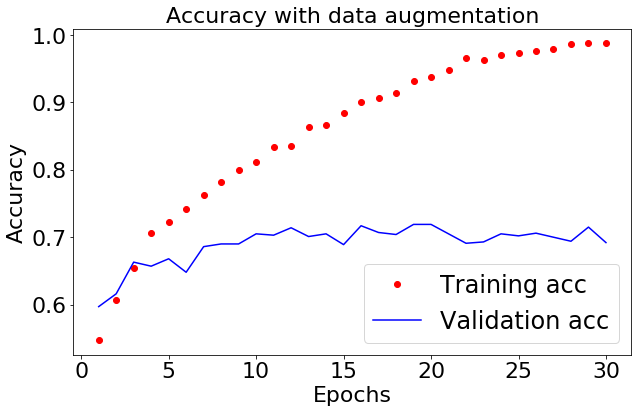

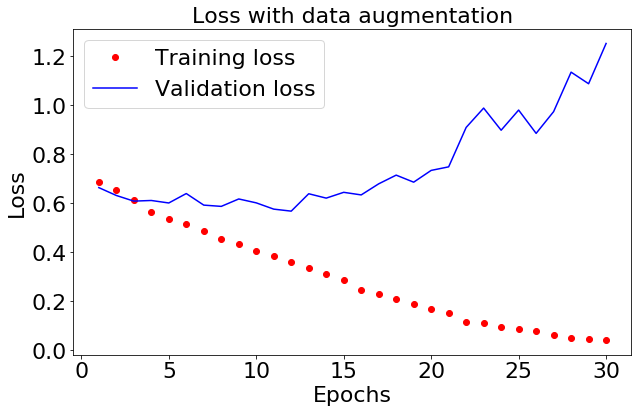

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(epochs, acc, 'ro', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')
ax.set_title('Accuracy with data augmentation', fontsize=22)
ax.set_xlabel(r'Epochs', fontsize=22)
ax.set_ylabel(r'Accuracy', fontsize=22)
ax.tick_params(labelsize=22)
ax.legend(fontsize=24)

figL, axL = plt.subplots(1,1, figsize=(10,6))

axL.plot(epochs, loss, 'ro', label='Training loss')
axL.plot(epochs, val_loss, 'b', label='Validation loss')
axL.set_title('Loss with data augmentation', fontsize=22)
axL.set_xlabel(r'Epochs', fontsize=22)
axL.set_ylabel(r'Loss', fontsize=22)
axL.tick_params(labelsize=22)
axL.legend(fontsize=22)

These plots are characteristic of overfitting. The training accuracy increases linearly, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly.

Because you have relatively few training samples (2,000), overfitting will be your number-one concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: *data augmentation*.

<a id='part1'></a>
## Part 1 - Data Augmentation

Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand: you would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by *augmenting* the samples via a number of random transformations that yield believable-looking images. The goal is that at training time your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In `Keras`, this can be done by configuring a number of random transformations to be performed on the images read by the `ImageDataGenerator` instance. Let’s get started with an example.

In [11]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more, see the [`Keras` documentation](https://keras.io/preprocessing/image/)). Let’s quickly go over this code:
* `rotation_range` is a value in degrees (0–180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can
appear after a rotation or a width/height shift. Let’s look at the augmented images 

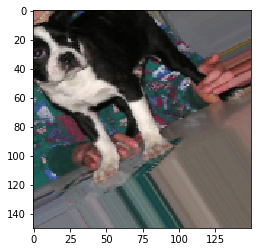

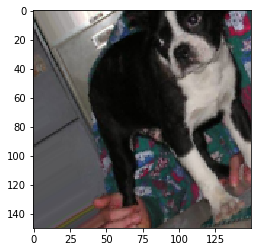

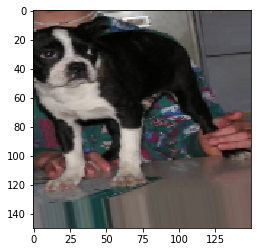

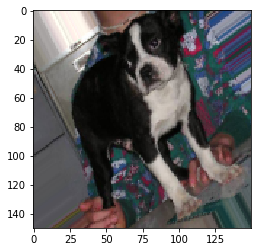

In [12]:
from keras.preprocessing import image
fnames = [os.path.join(train_dogs_dir, fname) for
     fname in os.listdir(train_dogs_dir)]
img_path = fnames[3] # Chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150))
# Reads the image and resizes it
x = image.img_to_array(img) # Converts it to a Numpy array with shape (150, 150, 3) 
x = x.reshape((1,) + x.shape) # Reshapes it to (1, 150, 150, 3)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If you train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a `Dropout` layer to your model right before the densely connected classifier.

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
# Let’s train the network using data augmentation and dropout.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255) # Note that the validation data shouldn’t be augmented!

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100, # TODO: should be 100
      validation_data=validation_generator,
      validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 126s 1s/step - loss: 0.6931 - acc: 0.5131 - val_loss: 0.6841 - val_acc: 0.5051
Epoch 2/100
100/100 [==============================] - 126s 1s/step - loss: 0.6790 - acc: 0.5612 - val_loss: 0.6573 - val_acc: 0.5914
Epoch 3/100
100/100 [==============================] - 120s 1s/step - loss: 0.6699 - acc: 0.5778 - val_loss: 0.6533 - val_acc: 0.5920
Epoch 4/100
100/100 [==============================] - 120s 1s/step - loss: 0.6564 - acc: 0.5941 - val_loss: 0.6234 - val_acc: 0.6478
Epoch 5/100
100/100 [==============================] - 118s 1s/step - loss: 0.6376 - acc: 0.6312 - val_loss: 0.6281 - val_acc: 0.6421
Epoch 6/100
100/100 [==============================] - 121s 1s/step - loss: 0.6174 - acc: 0.6534 - val_loss: 0.5951 - val_acc: 0.6707
Epoch 7/100
100/100 [==============================] - 120s 1s/step - loss: 0.5980 - acc: 0.6706 - val_loss: 0.6

And let’s plot the results again. Thanks to data augmentation and dropout, you’re no longer overfitting: the training curves are closely tracking the validation curves. You now reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.

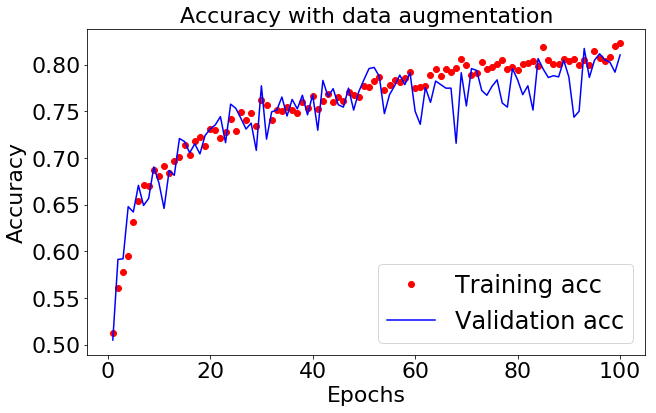

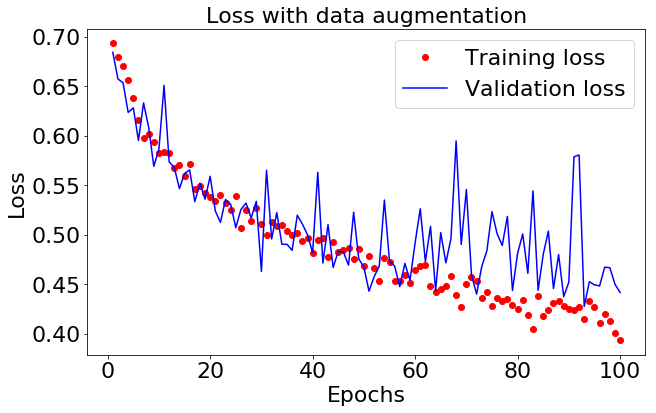

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(epochs, acc, 'ro', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')
ax.set_title('Accuracy with data augmentation', fontsize=22)
ax.set_xlabel(r'Epochs', fontsize=22)
ax.set_ylabel(r'Accuracy', fontsize=22)
ax.tick_params(labelsize=22)
ax.legend(fontsize=24)

figL, axL = plt.subplots(1,1, figsize=(10,6))

axL.plot(epochs, loss, 'ro', label='Training loss')
axL.plot(epochs, val_loss, 'b', label='Validation loss')
axL.set_title('Loss with data augmentation', fontsize=22)
axL.set_xlabel(r'Epochs', fontsize=22)
axL.set_ylabel(r'Loss', fontsize=22)
axL.tick_params(labelsize=22)
axL.legend(fontsize=22)


By using regularization techniques even further, and by tuning the network’s parameters (such as the number of filters per convolution layer, or the number of layers in the network), you may be able to get an even better accuracy, likely up to 86% or 87%. But it would prove difficult to go any higher just by training your own convnet from scratch, because you have so little data to work with. As a next step to improve your accuracy on this problem, you’ll have to use a pretrained model.

<a id='references'></a>
### References and Acknowledgements

* Most of this lab is based on the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python), Chapter 5 written by the Francois Chollet, the author of Keras. It is a very practical introduction to Deep Learning. It is appropriate for those with some Python knowledge who want to start with machine learning.

<a id='part2'></a>
## Part 2 - Comparing Two Networks

We will now compare a Fully Connected Network (Multi-Layer Perceptron, MLP) and a simple CNN on the task of image classification. We'll use a well known open dataset: CIFAR10. We will be using `Keras` for our networks.  Rather than use the usual `Keras` API, we will use the [functional API](https://keras.io/getting-started/functional-api-guide/).

You are using the CIFAR10 dataset in your current homework assignment.  CIFAR10 is a classic dataset released by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton (Machine learning legends). It consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

Here are some examples of the images in the dataset:

<img style="width:500px; height:400px" src="http://clouddatafacts.com/_images/cifar_10.png">


As you know, `Keras` allows us to easily imports well-known datasets like CIFAR10. We'll import the CIFAR10 dataset with `keras.datasets.cifar10.load_data()`. This will return two tuples of `numpy` arrays: `(x_train, y_train), (x_test, y_test)`. 

After that, we will implement an MLP and a CNN to classify the 10 classes of CIFAR10. 

Keras can build models in two different ways: *Sequential* and *Functional*. 

The Sequential API is a good starting point, as it allows you to easily create models layer by layer. This is the API that we've been using for the entire session so far.  Building a Sequential model just requires you to instantiate a `Sequential()` object with `model = Sequential()`, and adding layers after that is easily done with `model.add(layer)`. This API has several limitations:  it does not allow you to easily create bypass connections, share layers between models or have multiple inputs or outputs.

Small review example of the Sequential API:
```python
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=1))
model.add(Dense(1))
```

The [functional API](https://keras.io/getting-started/functional-api-guide/) allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. You can connect layers to any other layer, add more inputs to your network (even in the middle of it) and concatenate outputs easily. Creating complex networks, such as [ResNets](https://arxiv.org/abs/1512.03385), becomes feasible.

The same exact network as above, using the functional API, is:
```python
# We define an Input layer
inp = Input(shape=(1,))

# We instantiate a Dense layer and connect it to the previous layer with (inp)
x = Dense(10)(inp)

out = Dense(1)(x)

# We build the full model
model = Model(inputs=inp, outputs=out)
```

We will be using the Functional API in this lab, as this is the main mode that you will be using should you decide to build a serious network.

### Import the Dataset

In [16]:
# Imports
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
from keras.datasets import cifar10

We import the `CIFAR10` dataset, one-hot encode the labels and scale the training and test data.

In [17]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Load CIFAR10 dataset

# Convert to categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Scale the data
x_train = x_train / 255
x_test = x_test / 255

Let's plot some of the images to get a feeling for what we're dealing with.

Text(0.5, 0.98, 'Testing images')

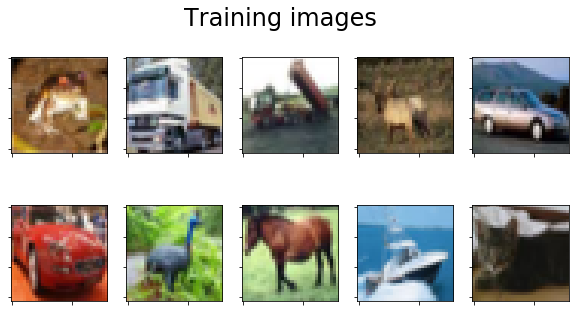

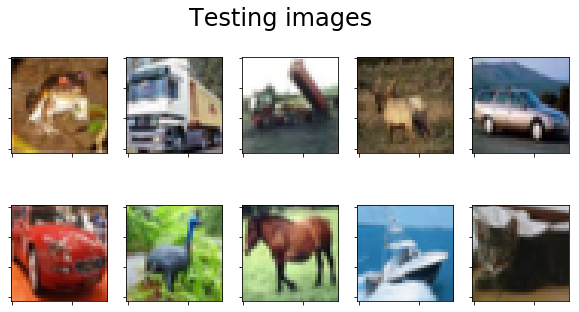

In [18]:
fig, ax = plt.subplots(2,5, figsize=(10,5))
row = 0
for i in range(10):
    if i > 4:
        row = 1
    ax[row][i%5].imshow(x_train[i])
    ax[row][i%5].tick_params(labelbottom=False, labelleft=False)

plt.suptitle('Training images', fontsize=24)
    
fig, ax = plt.subplots(2,5, figsize=(10,5))
row = 0
for i in range(10):
    if i > 4:
        row = 1
    ax[row][i%5].imshow(x_train[i])
    ax[row][i%5].tick_params(labelbottom=False, labelleft=False)

plt.suptitle('Testing images', fontsize=24)

Next we'll train the multi-layer perceptron (MLP).

#### The MLP
We will use the `Keras` functional API to build a fully-connected network with the following layers:
1. Input layer
2. Flatten layer (so that we can feed easily to Dense layers afterwards)
3. Dense layer, 512 nodes, relu activation
3. Dropout layer, 0.2 probability
4. Dense layer, 512 nodes, relu activation
3. Dropout layer, 0.2 probability
5. Dense layer, 256 nodes, relu activation
3. Dropout layer, 0.2 probability
5. Dense layer, 128 nodes, relu activation
3. Dropout layer, 0.2 probability
6. Dense layer, 10 nodes, softmax activation

In [19]:
# MLP network

inp = Input(shape = (32,32,3)) # 32x32 color images
x = Flatten()(inp) # Flatten the input

# Create 4 dense layers with dropout
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(10, activation='softmax')(x) # Output layer with 10 outputs

model = Model(inputs=inp, outputs=x) # Instantiate the model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
__________

Now we'll compile the model and train it.  We specify an optimizer (Adam), a loss function (categorical cross entropy), and request information on the accuracy.

We train the model using a batch size of 32 and a validation split of 0.2.  To save some time, we'll just train for 10 epochs.

In [20]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs = 10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 25s 624us/step - loss: 2.0713 - acc: 0.2166 - val_loss: 1.9107 - val_acc: 0.3019
Epoch 2/10
40000/40000 [==============================] - 25s 628us/step - loss: 1.9541 - acc: 0.2722 - val_loss: 1.9236 - val_acc: 0.2927
Epoch 3/10
40000/40000 [==============================] - 23s 585us/step - loss: 1.9156 - acc: 0.2899 - val_loss: 1.8660 - val_acc: 0.3076
Epoch 4/10
40000/40000 [==============================] - 23s 567us/step - loss: 1.8952 - acc: 0.3034 - val_loss: 1.8364 - val_acc: 0.3310
Epoch 5/10
40000/40000 [==============================] - 23s 586us/step - loss: 1.8838 - acc: 0.3077 - val_loss: 1.8636 - val_acc: 0.3336
Epoch 6/10
40000/40000 [==============================] - 22s 539us/step - loss: 1.8681 - acc: 0.3136 - val_loss: 1.8204 - val_acc: 0.3574
Epoch 7/10
40000/40000 [==============================] - 21s 514us/step - loss: 1.8541 - acc: 0.3195 - val_loss: 1.

All trained!  That took a while on the CPU, but we made it through.  Now we need to evaluate the peformance on our test set.

In [21]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 98us/step


[1.7820657327651979, 0.3569]

Now it's your turn.

Build a CNN with the following layers:
1. Conv2D, 32 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 32 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
1. Conv2D, 64 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 64 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
1. Conv2D, 128 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 128 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
5. Flatten layer
6. Dropout layer, 0.2 probability
7. Dense layer, 512 nodes, relu activation
8. Dropout, 0.5 probability
9. Dense layer, 10 nodes, softmax activation


* Use the `Keras` functional API.
* Train the CNN network
* Evaluate the CNN model on the test data set
* Discuss the differences between the MLP and the CNN

**Remarks:**

* Use the same loss function, optimizer, number of epochs, batch size, and validation split size as you did when you trained the MLP.
* `use_bias` has a default value of `True`.

**Hints:**

Here are the definitions of generic Conv2D layers, MaxPooling2D layers, Dense, Flatten and Dropout layers:

```python
x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
```

In [25]:
# CNN network

inp = Input(shape = (32,32,3))

x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(inp)
x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inp, outputs= x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
__________

In [26]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs = 10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 258s 6ms/step - loss: 1.6230 - acc: 0.4020 - val_loss: 1.2307 - val_acc: 0.5536
Epoch 2/10
40000/40000 [==============================] - 213s 5ms/step - loss: 1.1486 - acc: 0.5896 - val_loss: 0.9824 - val_acc: 0.6522
Epoch 3/10
40000/40000 [==============================] - 209s 5ms/step - loss: 0.9515 - acc: 0.6639 - val_loss: 0.9449 - val_acc: 0.6666
Epoch 4/10
40000/40000 [==============================] - 210s 5ms/step - loss: 0.8282 - acc: 0.7097 - val_loss: 0.8226 - val_acc: 0.7159
Epoch 5/10
40000/40000 [==============================] - 211s 5ms/step - loss: 0.7357 - acc: 0.7405 - val_loss: 0.7583 - val_acc: 0.7399
Epoch 6/10
40000/40000 [==============================] - 212s 5ms/step - loss: 0.6670 - acc: 0.7651 - val_loss: 0.7229 - val_acc: 0.7576
Epoch 7/10
40000/40000 [==============================] - 213s 5ms/step - loss: 0.6107 - acc: 0.7848 - val_loss: 0.7084 - 

In [27]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 17s 2ms/step


[0.7870700119018554, 0.7528]

The CNN performs much better: in 10 epochs, it gets to much higher accuracy than the MLP, and with fewer parameters!